# Data preparation and preprocessing

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [2]:
data= pd.read_csv('city_day.csv')
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
#summary of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [4]:
#Checking Null Value

data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

#### Percentage of  null value for each attribute

<AxesSubplot:title={'center':'Percentage of Missing Values'}, xlabel='Attributes', ylabel='% of Missing Values'>

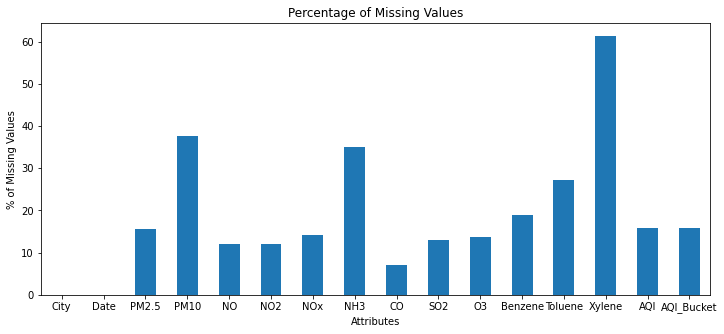

In [5]:
percentage_missing=(data.isnull().sum() * 100 / len(data)).round(2)
percentage_missing.plot(kind='bar',rot=0,figsize=(12,5),title='Percentage of Missing Values',ylabel='% of Missing Values',xlabel='Attributes')

#### Deleting Rows in which all pollutant level are null

In [6]:
data = data.dropna(how='all',subset=['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket'])
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [7]:
data.isnull().sum()

City              0
Date              0
PM2.5          3224
PM10           9766
NO             2208
NO2            2211
NOx            2811
NH3            8954
CO              685
SO2            2480
O3             2648
Benzene        4249
Toluene        6667
Xylene        16735
AQI            3307
AQI_Bucket     3307
dtype: int64

<AxesSubplot:title={'center':'Percentage of Missing Values after deleting all NULL rows'}, xlabel='Attributes', ylabel='% of Missing Values'>

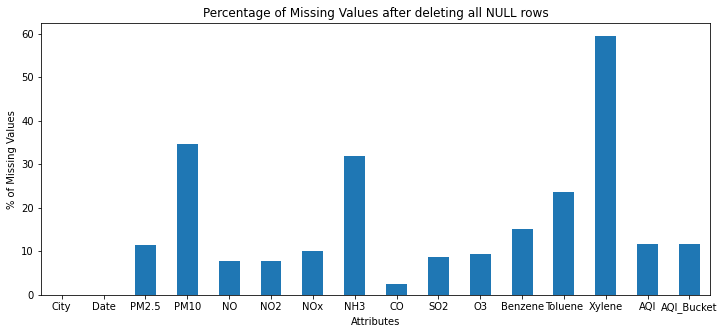

In [8]:
percentage_missing=(data.isnull().sum() * 100 / len(data)).round(2)
percentage_missing.plot(kind='bar',rot=0,figsize=(12,5),title='Percentage of Missing Values after deleting all NULL rows',xlabel='Attributes',ylabel='% of Missing Values')

#### Handling missing values

In [9]:
data1 = data[['City','Date','PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']]
interpolated = data1.interpolate(limit_direction="both")
interpolated.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78


#### Joining the last two columns to new dataframe

In [10]:
data = interpolated.join(data[['AQI','AQI_Bucket']])
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [11]:
data.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI           3307
AQI_Bucket    3307
dtype: int64

# Linear regression for filling missing values of AQI

In [12]:
test_df = data.loc[data['AQI'].isnull() == True,:].copy()
train_df = data.loc[data['AQI'].isnull() == False,:].copy()

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

y = train_df['AQI']
X_train = train_df.loc[:,['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]


lr.fit(X_train,y)

X_test = test_df.loc[:,['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]


pred = lr.predict(X_test)
test_df['AQI'] = pred

In [14]:
test_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,190.565168,NaN
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,164.144193,NaN
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,330.683467,NaN
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,171.609315,NaN
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,386.965496,NaN


#### Joining test and train set

In [15]:
data_new = pd.concat([test_df,train_df])

In [16]:
data_new['AQI'] = data_new['AQI'].astype(float).round(2)

<hr/>

The pre-defined buckets of AQI are as follows:
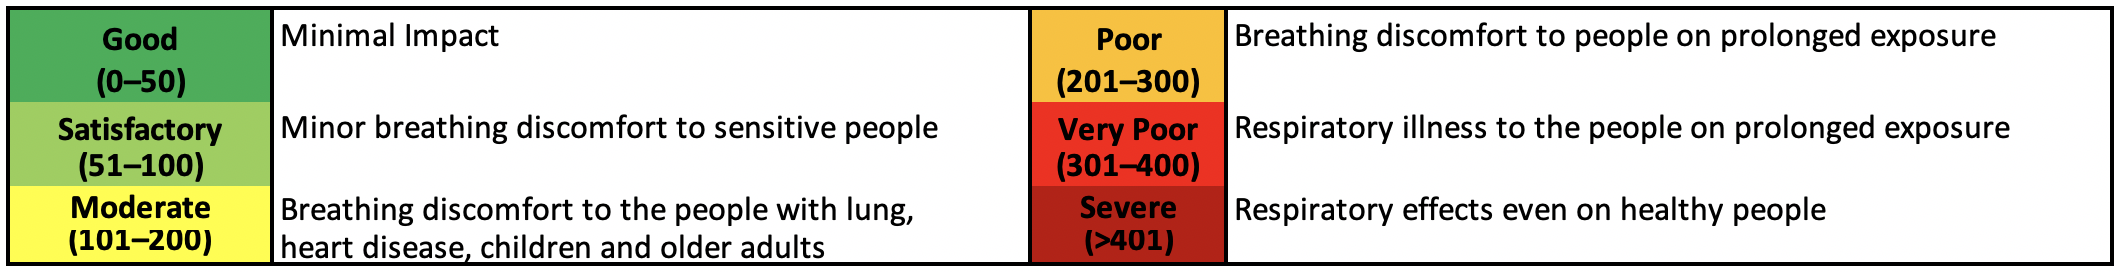



In [17]:
# AQI bucketing

def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [18]:
data_new["AQI_bucket_calculated"] = data_new["AQI"].apply(lambda x: get_AQI_bucket(x))

In [19]:
data_new.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,AQI_bucket_calculated
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,190.57,NaN,Moderate
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,164.14,NaN,Moderate
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,330.68,NaN,Very Poor
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,171.61,NaN,Moderate
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,386.97,NaN,Very Poor


In [20]:
data_new['match'] = np.where(data_new['AQI_bucket_calculated'] == data_new['AQI_Bucket'], 'True', 'False')

In [21]:
data_new['match'].value_counts()

True     24850
False     3307
Name: match, dtype: int64

Dropping columns : `'AQI_Bucket','match'` as they are not required

In [22]:
data_new.drop(['AQI_Bucket','match'],axis=1,inplace=True)

In [23]:
data_new.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_bucket_calculated
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,190.57,Moderate
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,164.14,Moderate
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,330.68,Very Poor
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,171.61,Moderate
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,386.97,Very Poor


In [24]:
data_new.isnull().sum()

City                     0
Date                     0
PM2.5                    0
PM10                     0
NO                       0
NO2                      0
NOx                      0
NH3                      0
CO                       0
SO2                      0
O3                       0
Benzene                  0
Toluene                  0
Xylene                   0
AQI                      0
AQI_bucket_calculated    0
dtype: int64

In [25]:
#Encoding AQI Bucket

AQI_Bucket_encoded = {'Good':0,'Satisfactory':1,'Moderate':2,'Poor':3,'Very Poor':4,'Severe':5}

data_new_labeled = data_new.replace(AQI_Bucket_encoded)
data_new_labeled.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_bucket_calculated
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,190.57,2
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,164.14,2
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,330.68,4
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,171.61,2
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,386.97,4


In [26]:
data_new_labeled.to_csv('city_day_new.csv')

# Data Visualization 

<AxesSubplot:xlabel='AQI', ylabel='PM2.5'>

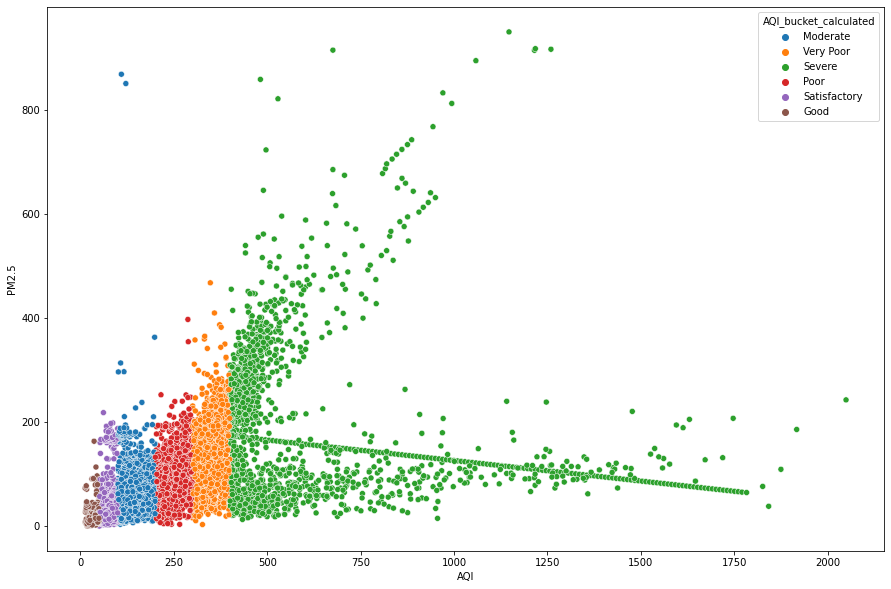

In [27]:
fig = plt.figure(figsize=(15,10))
sns.scatterplot(x= 'AQI', y= 'PM2.5', data=data_new,hue ='AQI_bucket_calculated')

<AxesSubplot:ylabel='AQI_bucket_calculated'>

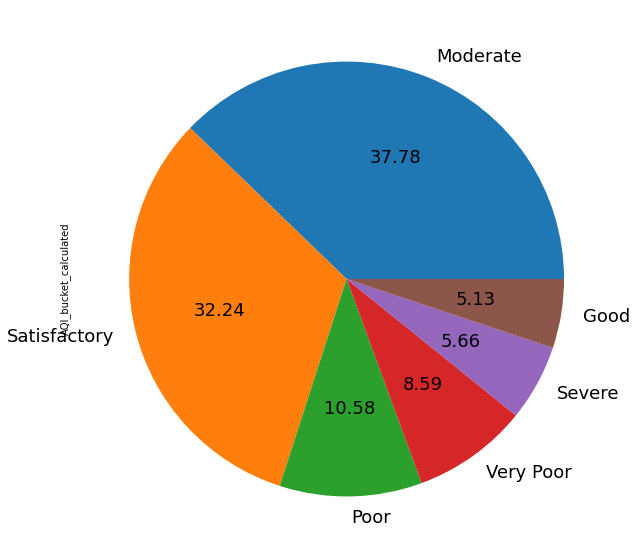

In [28]:
fig = plt.figure(figsize=(15,10))
data_new['AQI_bucket_calculated'].value_counts().plot.pie(autopct='%.2f',textprops={'fontsize': 18})

<AxesSubplot:xlabel='Year'>

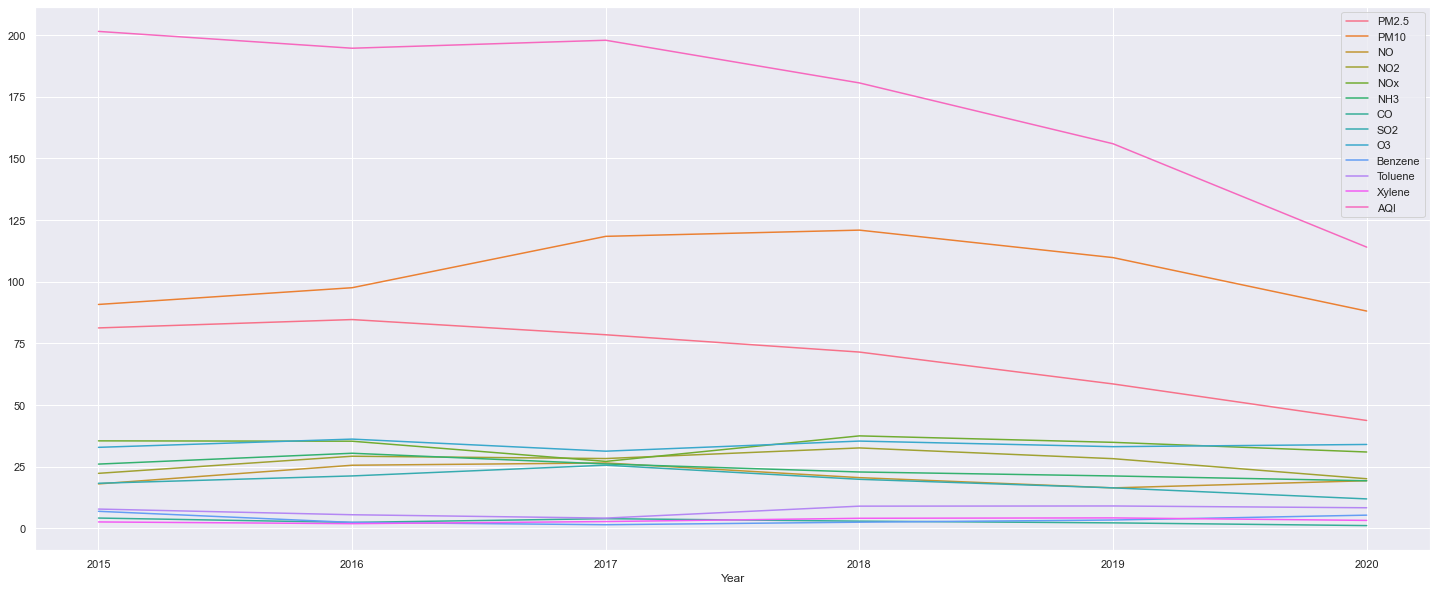

In [29]:
sns.set_theme(style="darkgrid")

data_new['Date'] = pd.to_datetime(data_new['Date'])
data_temp= data_new.copy()
data_temp['Year'] = data_temp.Date.dt.year.astype(int)
fig = plt.figure(figsize=(25,10))

sns.lineplot(data = data_temp.groupby('Year').mean(),dashes=False)


# Distribution of AQI Bucket

<AxesSubplot:xlabel='Air Quality', ylabel='Count'>

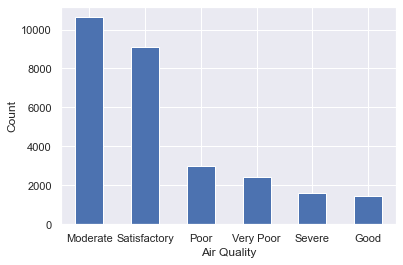

In [30]:
data_new['AQI_bucket_calculated'].value_counts().plot(kind='bar',rot=0,xlabel='Air Quality',ylabel='Count')

In [31]:
cols=['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

X=data_new_labeled[cols]
y=data_new_labeled['AQI_bucket_calculated']

In [32]:
X

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00
1,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77
2,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25
3,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00
4,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00


In [33]:
y

0        2
1        2
2        4
3        2
4        4
        ..
29526    0
29527    1
29528    1
29529    1
29530    0
Name: AQI_bucket_calculated, Length: 28157, dtype: int64

In [34]:
y.value_counts()

2    10639
1     9079
3     2979
4     2420
5     1595
0     1445
Name: AQI_bucket_calculated, dtype: int64

<AxesSubplot:ylabel='AQI_bucket_calculated'>

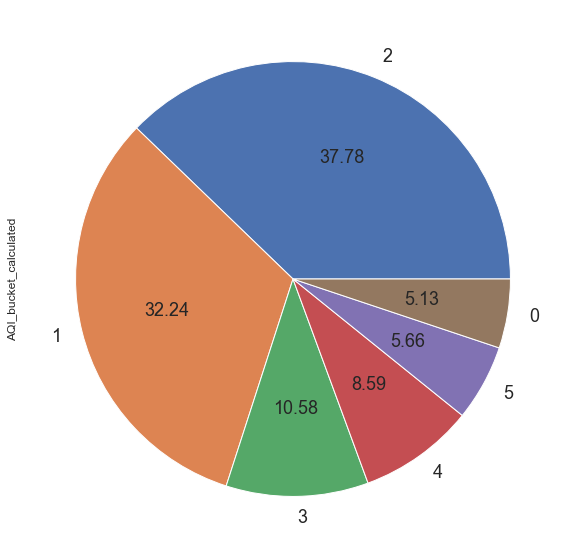

In [35]:
fig = plt.figure(figsize=(15,10))
y.value_counts().plot.pie(autopct='%.2f',textprops={'fontsize': 18})

# Implementing model before applying Oversampling and undersampling

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=42)

# 1. Naive Bayes before applying Oversampling and undersampling

In [37]:
from sklearn.naive_bayes import GaussianNB

nb_initial_model = GaussianNB()

nb_initial_model.fit(X_train,y_train)

y_pred = nb_initial_model.predict(X_test)

# predict probabilities
nb_initial_pred_prob = nb_initial_model.predict_proba(X_test)

In [38]:
from sklearn import metrics
acc_score_nb_before = metrics.accuracy_score(y_test, y_pred)
f1_score_nb_before = metrics.f1_score(y_test, y_pred,average='weighted')
precision_nb_before = metrics.precision_score(y_test, y_pred,average='weighted')
recall_nb_before = metrics.recall_score(y_test, y_pred,average='weighted')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(4))
print("Weighted F1 Score:",f1_score_nb_before.round(4))
print("Weighted Precision:",precision_nb_before.round(4))
print("Weighted Recall:",recall_nb_before.round(4))

Accuracy: 0.6173
Weighted F1 Score: 0.609
Weighted Precision: 0.6386
Weighted Recall: 0.6173


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 190  374   14    2    0    2]
 [ 181 3121  260   51    2   11]
 [  76 1608 2064  361   22   64]
 [  11   32  361  656  105   31]
 [   1    4   35  415  468   86]
 [   0    2    9   16  174  454]]
              precision    recall  f1-score   support

           0       0.41      0.33      0.37       582
           1       0.61      0.86      0.71      3626
           2       0.75      0.49      0.59      4195
           3       0.44      0.55      0.49      1196
           4       0.61      0.46      0.53      1009
           5       0.70      0.69      0.70       655

    accuracy                           0.62     11263
   macro avg       0.59      0.56      0.56     11263
weighted avg       0.64      0.62      0.61     11263



In [40]:
CM = confusion_matrix(y_test, y_pred)

FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('TPR:',TPR.round(4))
print('FPR:',FPR.round(4))
print('ACC:',ACC.round(4))

TPR: [0.3265 0.8607 0.492  0.5485 0.4638 0.6931]
FPR: [0.0252 0.2645 0.0961 0.0839 0.0295 0.0183]
ACC: [0.9413 0.7758 0.7505 0.877  0.9251 0.9649]


ROC AUC score: 0.90220015837233


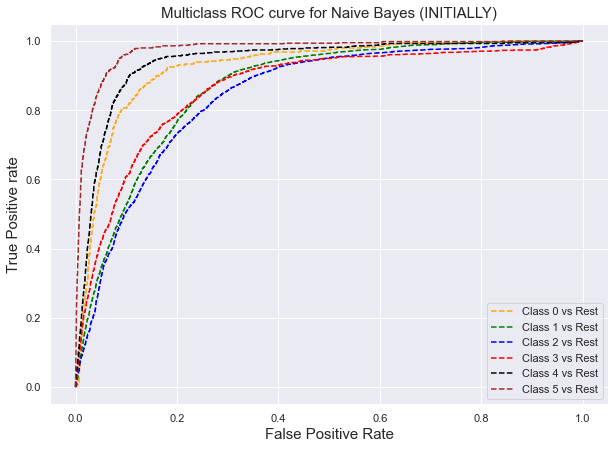

In [41]:
# roc curve for classes
plt.figure(figsize=(10,7))

fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, nb_initial_pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='brown', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Naive Bayes (INITIALLY)',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive rate',fontsize=15)
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

print('ROC AUC score:',roc_auc_score(y_test, nb_initial_pred_prob,multi_class='ovr'))

# 2. KNN before applying Oversampling and undersampling

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_initial_model = KNeighborsClassifier(n_neighbors=5)
knn_initial_model.fit(X_train, y_train)

y_pred = knn_initial_model.predict(X_test)

# predict probabilities
knn_initial_pred_prob = knn_initial_model.predict_proba(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 348  219   13    2    0    0]
 [ 122 3012  481    7    3    1]
 [   8  579 3426  162   15    5]
 [   0   26  352  688  118   12]
 [   0    1   38  178  709   83]
 [   0    1    8   12   95  539]]
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       582
           1       0.78      0.83      0.81      3626
           2       0.79      0.82      0.80      4195
           3       0.66      0.58      0.61      1196
           4       0.75      0.70      0.73      1009
           5       0.84      0.82      0.83       655

    accuracy                           0.77     11263
   macro avg       0.76      0.72      0.74     11263
weighted avg       0.77      0.77      0.77     11263



In [44]:
from sklearn import metrics
acc_score_knn_before = metrics.accuracy_score(y_test, y_pred)
f1_score_knn_before = metrics.f1_score(y_test, y_pred,average='weighted')
precision_knn_before = metrics.precision_score(y_test, y_pred,average='weighted')
recall_knn_before = metrics.recall_score(y_test, y_pred,average='weighted') 

print("Accuracy:",acc_score_knn_before.round(4))
print("Weighted F1 Score:",f1_score_knn_before.round(4))
print("Weighted Precision:",precision_knn_before.round(4))
print("Weighted Recall:",recall_knn_before.round(4))

Accuracy: 0.7744
Weighted F1 Score: 0.7722
Weighted Precision: 0.772
Weighted Recall: 0.7744


In [45]:
CM = confusion_matrix(y_test, y_pred)

FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('TPR:',TPR.round(4))
print('FPR:',FPR.round(4))
print('ACC:',ACC.round(4))

TPR: [0.5979 0.8307 0.8167 0.5753 0.7027 0.8229]
FPR: [0.0122 0.1082 0.1262 0.0359 0.0225 0.0095]
ACC: [0.9677 0.8721 0.8525 0.9228 0.9529 0.9807]


ROC_AUC Score: 0.9293695980392954


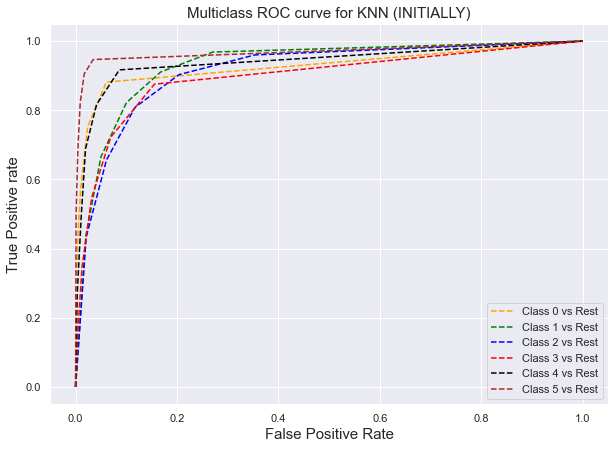

In [46]:
# roc curve for classes
plt.figure(figsize=(10,7))

fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, knn_initial_pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='brown', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN (INITIALLY)',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive rate',fontsize=15)
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

print('ROC_AUC Score:',roc_auc_score(y_test, knn_initial_pred_prob,multi_class='ovr'))

# Oversampling (SMOTE)

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [49]:
X_res.shape

(63834, 12)

In [50]:
y_res.value_counts()

2    10639
4    10639
5    10639
3    10639
1    10639
0    10639
Name: AQI_bucket_calculated, dtype: int64

<AxesSubplot:ylabel='AQI_bucket_calculated'>

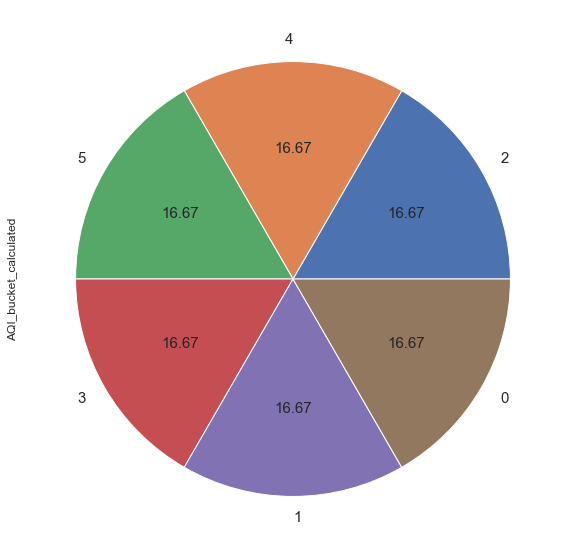

In [51]:
fig = plt.figure(figsize=(10,10))
y_res.value_counts().plot.pie(autopct='%.2f',fontsize=15)

# Testing Model after Oversampling

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.40,random_state=42)

## 1. Naive Bayes after Oversampling(SMOTE)

In [53]:
nb_smote_model = GaussianNB()

nb_smote_model.fit(X_train,y_train)

y_pred_SMOTE = nb_smote_model.predict(X_test)

# predict probabilities
nb_smote_pred_prob = nb_smote_model.predict_proba(X_test)

In [54]:
acc_score_nb_afteros=metrics.accuracy_score(y_test, y_pred_SMOTE)
f1_score_nb_afteros=metrics.f1_score(y_test, y_pred_SMOTE,average='weighted')
precision_nb_afteros=metrics.precision_score(y_test, y_pred_SMOTE,average='weighted')
recall_nb_afteros=metrics.recall_score(y_test, y_pred_SMOTE,average='weighted')

print("Accuracy:",acc_score_nb_afteros.round(4))
print("Weighted F1 Score:",f1_score_nb_afteros.round(4))
print("Weighted Precision:",precision_nb_afteros.round(4))
print("Weighted Recall:",recall_nb_afteros.round(4))

Accuracy: 0.633
Weighted F1 Score: 0.6252
Weighted Precision: 0.6325
Weighted Recall: 0.633


In [55]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_SMOTE))
print(classification_report(y_test, y_pred_SMOTE))

[[3876  294   90    9    0   20]
 [1838 1983  353   68    9   18]
 [ 166 1311 1816  805   43  100]
 [  22  137  625 2944  414  131]
 [   1   27   98 1251 2358  448]
 [   2    8   26   67  991 3185]]
              precision    recall  f1-score   support

           0       0.66      0.90      0.76      4289
           1       0.53      0.46      0.49      4269
           2       0.60      0.43      0.50      4241
           3       0.57      0.69      0.63      4273
           4       0.62      0.56      0.59      4183
           5       0.82      0.74      0.78      4279

    accuracy                           0.63     25534
   macro avg       0.63      0.63      0.62     25534
weighted avg       0.63      0.63      0.63     25534



In [56]:
CM = confusion_matrix(y_test, y_pred_SMOTE)

FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('TPR:',TPR.round(4))
print('FPR:',FPR.round(4))
print('ACC:',ACC.round(4))

TPR: [0.9037 0.4645 0.4282 0.689  0.5637 0.7443]
FPR: [0.0955 0.0836 0.056  0.1035 0.0682 0.0337]
ACC: [0.9044 0.8409 0.8583 0.8618 0.8715 0.9291]


ROC_AUC Score: 0.9160763059696748


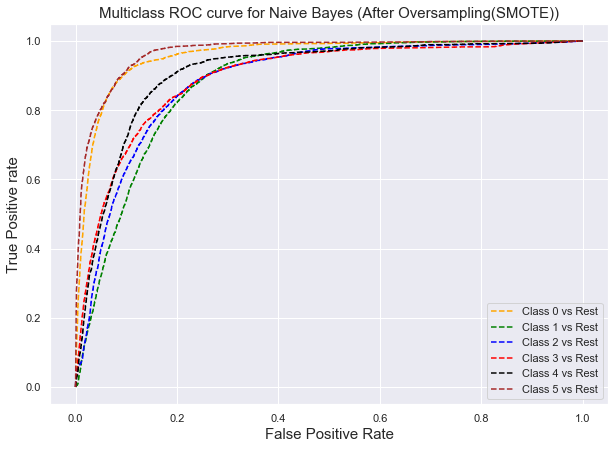

In [57]:
# roc curve for classes
plt.figure(figsize=(10,7))

fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, nb_smote_pred_prob[:,i], pos_label=i)
   
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='brown', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Naive Bayes (After Oversampling(SMOTE))',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive rate',fontsize=15)
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

print('ROC_AUC Score:',roc_auc_score(y_test, nb_smote_pred_prob,multi_class='ovr'))

## 2. KNN after Oversampling(SMOTE)

In [58]:
knn_smote_model = KNeighborsClassifier(n_neighbors=5)
knn_smote_model.fit(X_train, y_train)

y_pred_SMOTE = knn_smote_model.predict(X_test)

# predict probabilities
knn_smote_pred_prob = knn_smote_model.predict_proba(X_test)

In [59]:
acc_score_knn_afteros = metrics.accuracy_score(y_test, y_pred_SMOTE)
f1_score_knn_afteros = metrics.f1_score(y_test, y_pred_SMOTE,average='weighted')
precision_knn_afteros = metrics.precision_score(y_test, y_pred_SMOTE,average='weighted')
recall_knn_afteros = metrics.recall_score(y_test, y_pred_SMOTE,average='weighted')

print("Accuracy:",acc_score_knn_afteros.round(4))
print("Weighted F1 Score:",f1_score_knn_afteros.round(4))
print("Weighted Precision:",precision_knn_afteros.round(4))
print("Weighted Recall:",recall_knn_afteros.round(4))

Accuracy: 0.8683
Weighted F1 Score: 0.8663
Weighted Precision: 0.8669
Weighted Recall: 0.8683


In [60]:
print(confusion_matrix(y_test, y_pred_SMOTE))
print(classification_report(y_test, y_pred_SMOTE))

[[4204   70   12    3    0    0]
 [ 502 3298  440   24    5    0]
 [  69  619 3027  497   23    6]
 [   6   37  191 3742  279   18]
 [   0    4   14  251 3753  161]
 [   1    7    3   15  106 4147]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      4289
           1       0.82      0.77      0.79      4269
           2       0.82      0.71      0.76      4241
           3       0.83      0.88      0.85      4273
           4       0.90      0.90      0.90      4183
           5       0.96      0.97      0.96      4279

    accuracy                           0.87     25534
   macro avg       0.87      0.87      0.87     25534
weighted avg       0.87      0.87      0.87     25534



In [61]:
CM = confusion_matrix(y_test, y_pred_SMOTE)

FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('TPR:',TPR.round(4))
print('FPR:',FPR.round(4))
print('ACC:',ACC.round(4))

TPR: [0.9802 0.7725 0.7137 0.8757 0.8972 0.9692]
FPR: [0.0272 0.0347 0.031  0.0372 0.0193 0.0087]
ACC: [0.974  0.9331 0.9266 0.9483 0.967  0.9876]


ROC_AUC Score: 0.9742640875253717


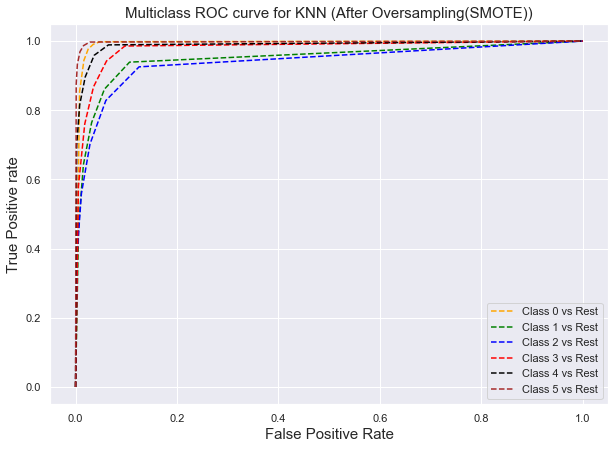

In [62]:
# roc curve for classes
plt.figure(figsize=(10,7))

fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, knn_smote_pred_prob[:,i], pos_label=i)
    
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='brown', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN (After Oversampling(SMOTE))',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive rate',fontsize=15)
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300)

print('ROC_AUC Score:',roc_auc_score(y_test, knn_smote_pred_prob,multi_class='ovr'))

# Analysis

In [63]:
acc=[acc_score_nb_before.round(2),acc_score_knn_before.round(2),acc_score_nb_afteros.round(2),acc_score_knn_afteros.round(2)]


In [64]:
initial_acc = [acc_score_nb_before.round(4),acc_score_knn_before.round(4)]
oversampling_acc = [acc_score_nb_afteros.round(4),acc_score_knn_afteros.round(4)]



value={ "Model":['Naive Bayes','KNN'],
        "Initial Accuracy": initial_acc,
        "Oversampling(SMOTE) Accuracy":oversampling_acc,
}

df_acc = pd.DataFrame(value)
df_acc

,Model,Initial Accuracy,Oversampling(SMOTE) Accuracy
0,Naive Bayes,0.6173,0.6330
1,KNN,0.7744,0.8683


In [65]:
initial_f1 = [f1_score_nb_before.round(4),f1_score_knn_before.round(4)]
oversampling_f1 = [f1_score_nb_afteros.round(4),f1_score_knn_afteros.round(4)]



value={ "Model":['Naive Bayes','KNN'],
        "Initial F1 Score": initial_f1,
        "Oversampling(SMOTE) F1 Score":oversampling_f1,
}

df_f1 = pd.DataFrame(value)
df_f1

,Model,Initial F1 Score,Oversampling(SMOTE) F1 Score
0,Naive Bayes,0.6090,0.6252
1,KNN,0.7722,0.8663


In [66]:
initial_pre = [precision_nb_before.round(4),precision_knn_before.round(4)]
oversampling_pre = [precision_nb_afteros.round(4),precision_knn_afteros.round(4)]



value={ "Model":['Naive Bayes','KNN'],
        "Initial Precision": initial_pre,
        "Oversampling(SMOTE) Precision":oversampling_pre,
}

df_pre = pd.DataFrame(value)
df_pre

,Model,Initial Precision,Oversampling(SMOTE) Precision
0,Naive Bayes,0.6386,0.6325
1,KNN,0.7720,0.8669


In [67]:
initial_recall = [recall_nb_before.round(4),recall_knn_before.round(4)]
oversampling_recall = [recall_nb_afteros.round(4),recall_knn_afteros.round(4)]



value={ "Model":['Naive Bayes','KNN'],
        "Initial Recall": initial_recall,
        "Oversampling(SMOTE) Recall":oversampling_recall,
}

df_recall = pd.DataFrame(value)
df_recall

,Model,Initial Recall,Oversampling(SMOTE) Recall
0,Naive Bayes,0.6173,0.6330
1,KNN,0.7744,0.8683


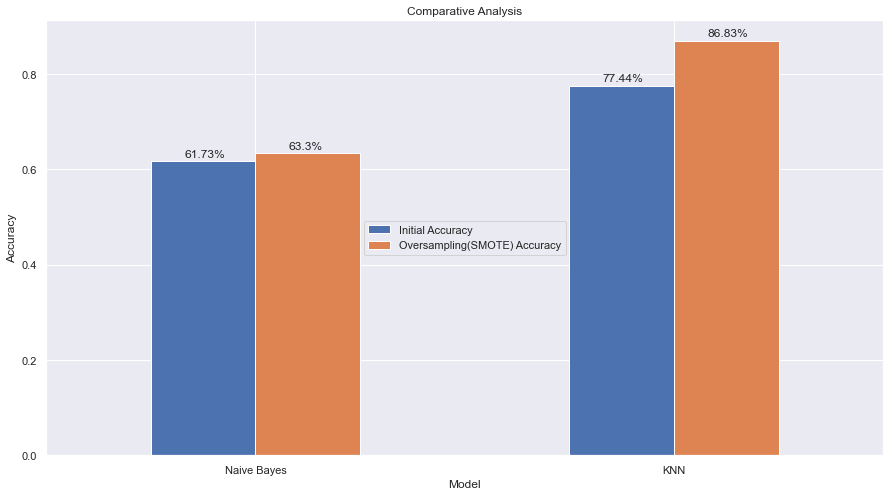

In [68]:
ax = df_acc.plot(x='Model',ylabel="Accuracy",kind='bar',legend=True,figsize=(15,8),title="Comparative Analysis",rot=0)
plt.legend(loc='center')

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.08, i.get_height()*1.013, \
            str(round(i.get_height()*100, 2))+'%')

In [69]:
df_acc.to_csv('analysis1.csv')
df_f1.to_csv('analysis2.csv')
df_pre.to_csv('analysis3.csv')
df_recall.to_csv('analysis4.csv')